In [29]:
import matplotlib.pyplot as plt
import numpy as np
import csv

#заполняем ячейки полученными значениями
answers = dict()
algorithms = ('Implicit', 'Explicit', 'CrankNicholson')
with open('Analytic.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    analytic_values = []
    for row in csv_reader:
        numeric_row = [float(value) for value in row]
        analytic_values.append(numeric_row)
answers["Analytic"] = analytic_values

with open('Implicit.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    implicit_values = []
    for row in csv_reader:
        numeric_row = [float(value) for value in row]
        implicit_values.append(numeric_row)
answers["Implicit"] = implicit_values

with open('Explicit.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    explicit_values = []
    for row in csv_reader:
        numeric_row = [float(value) for value in row]
        explicit_values.append(numeric_row)
answers["Explicit"] = explicit_values

with open('CrankNicholson.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    crank_values = []
    for row in csv_reader:
        numeric_row = [float(value) for value in row]
        crank_values.append(numeric_row)
answers["CrankNicholson"] = crank_values

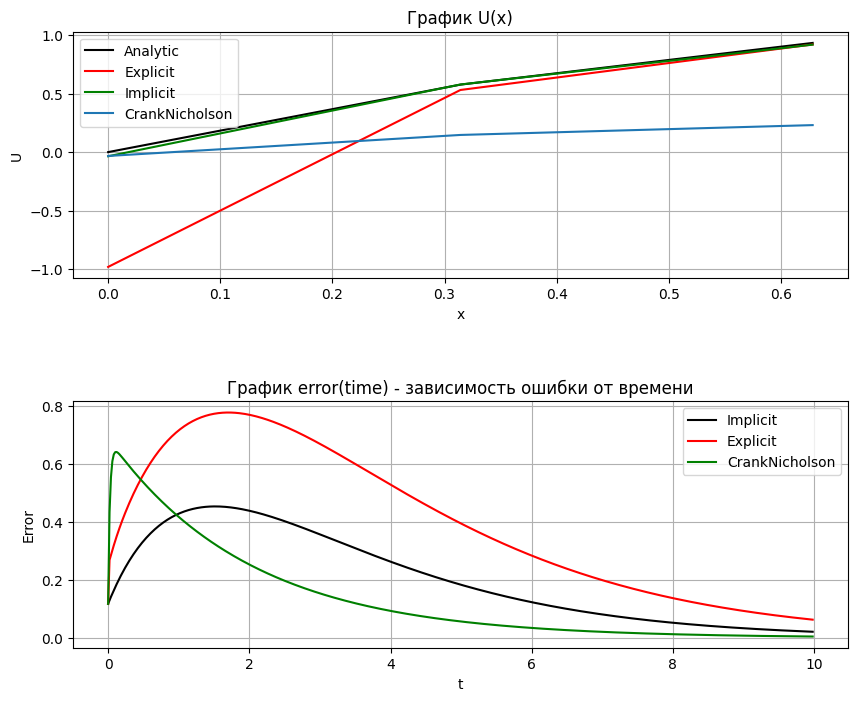

In [34]:
T = 10
K = 500
N = 5

def calculate_error(numeric_data, analytic_data):
    error_list = []
    error_values = [[abs(i - j) for i, j in zip(x, y)] for x, y in zip(numeric_data, analytic_data)]
    for i in range(len(error_values)):
        tmp = 0
        for j in error_values[i]:
            tmp += j
        error_list.append(tmp / len(error_values[i]))
    return error_list


def make_graphics(data_dict, N, K, T, time=2):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.subplots_adjust(hspace=0.5)
    x_values = np.arange(0, np.pi / 2, np.pi / 2 / N)
    time_values = np.arange(0, T, T / K)
    analytic_values = np.array(data_dict['Analytic'])
    explicit_values = np.array(data_dict['Explicit'])
    implicit_values = np.array(data_dict['Implicit'])
    crank_nicholson_values = np.array(data_dict['CrankNicholson'])

    colors = ['black', 'red', 'green']
    ax1.set_title('График U(x)')
    ax1.plot(x_values[0:-2], analytic_values[time][0:-2], color=colors[0], label='Analytic')
    ax1.plot(x_values[0:-2], explicit_values[time][0:-2], color=colors[1], label='Explicit')
    ax1.plot(x_values[0:-2], implicit_values[time][0:-2], color=colors[2], label='Implicit')
    ax1.plot(x_values[0:-2], crank_nicholson_values[time][0:-2], label='CrankNicholson')
    ax1.legend(loc='best')
    ax1.set_ylabel('U')
    ax1.set_xlabel('x')
    ax1.grid(True)
  
    ax2.set_title('График error(time) - зависимость ошибки от времени')
    for method, color in zip(algorithms, colors):
        ax2.plot(time_values, calculate_error(data_dict[method], data_dict['Analytic']), label=method, color=color)
    ax2.legend(loc='best')
    ax2.set_ylabel('Error')
    ax2.set_xlabel('t')
    ax2.grid(True)
    plt.show()

make_graphics(answers, N, K, T)